# Assignment 2

Suggested due date: 24th October 2018

## Multilayer perceptron / Feedforward network

The aims for this assignment are:
* Implement a simple MLP classifier in Tensorflow
* Train a neural network using backpropagation

We will build a multilayer perceptron as a classifier, and train it using backpropagation. The MLP consists of several densely connected layers

## MNIST MLP classifier

<p align="center">
  <img width="460" height="300" src=mnist.png>
</p>

For this assignment you will need to download the MNIST dataset, which is available <a href=“http://yann.lecun.com/exdb/mnist/“>here</a>. This dataset consists of 28x28 grayscale images, with associated labels for which digit the image contains (0-9). The training set consists of 60,000 examples and the test set is 10,000 examples.

The MLP is a densely connected network, with <a href="https://www.codecogs.com/eqnedit.php?latex=$N$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$N$" title="$N$" /></a> layers <a href="https://www.codecogs.com/eqnedit.php?latex=$h_1,\ldots,h_N$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$h_1,\ldots,h_N$" title="$h_1,\ldots,h_N$" /></a>, where <a href="https://www.codecogs.com/eqnedit.php?latex=$h_i\in\mathbb{R}^{n_i}$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$h_i\in\mathbb{R}^{n_i}$" title="$h_i\in\mathbb{R}^{n_i}$" /></a>. The input <a href="https://www.codecogs.com/eqnedit.php?latex=$\mathbf{x}&space;=&space;h_1$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$\mathbf{x}&space;=&space;h_1$" title="$\mathbf{x} = h_1$" /></a> and output <a href="https://www.codecogs.com/eqnedit.php?latex=$\mathbf{y}&space;=&space;h_N$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$\mathbf{y}&space;=&space;h_N$" title="$\mathbf{y} = h_N$" /></a>. For <a href="https://www.codecogs.com/eqnedit.php?latex=$i=1,\ldots,N-1$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$i=1,\ldots,N-1$" title="$i=1,\ldots,N-1$" /></a>, the pre-activations are given by

<a href="https://www.codecogs.com/eqnedit.php?latex=\hat{h}_{i&plus;1}&space;=&space;W^{(i)}h_i&space;&plus;&space;b^{(i)}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\hat{h}_{i&plus;1}&space;=&space;W^{(i)}h_i&space;&plus;&space;b^{(i)}" title="\hat{h}_{i+1} = W^{(i)}h_i + b^{(i)}" /></a>,

where <a href="https://www.codecogs.com/eqnedit.php?latex=$W^{(i)}\in\mathbb{R}^{n_{i&plus;1}\times&space;n_i}$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$W^{(i)}\in\mathbb{R}^{n_{i&plus;1}\times&space;n_i}$" title="$W^{(i)}\in\mathbb{R}^{n_{i+1}\times n_i}$" /></a> and <a href="https://www.codecogs.com/eqnedit.php?latex=$b^{(i)}&space;\in\mathbb{R}^{n_{i&plus;1}}$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$b^{(i)}&space;\in\mathbb{R}^{n_{i&plus;1}}$" title="$b^{(i)} \in\mathbb{R}^{n_{i+1}}$" /></a>. The post-activations are given by 

<a href="https://www.codecogs.com/eqnedit.php?latex=h_{i&plus;1}&space;=&space;\sigma&space;(\hat{h}_{i&plus;1})" target="_blank"><img src="https://latex.codecogs.com/gif.latex?h_{i&plus;1}&space;=&space;\sigma&space;(\hat{h}_{i&plus;1})" title="h_{i+1} = \sigma (\hat{h}_{i+1})" /></a>,

where <a href="https://www.codecogs.com/eqnedit.php?latex=$\sigma:\mathbb{R}\rightarrow\mathbb{R}$" target="_blank"><img src="https://latex.codecogs.com/gif.latex?$\sigma:\mathbb{R}\rightarrow\mathbb{R}$" title="$\sigma:\mathbb{R}\rightarrow\mathbb{R}$" /></a> is an activation function that is applied element-wise.

For our classifier, we will flatten the inputs so it is a 784-length vector, and this will serve as input to the first hidden layer. You may also want to rescale the inputs. The output should be a 10-way softmax layer to predict the digit label.

## Implementation in Tensorflow

The assignment is to implement the MLP classifier for MNIST in Tensorflow, train it with one of the available optimisers and test the classification performance on the test set. Write your solution as a python script.

You should choose the number of layers for the network, the size of those layers and the activation functions (try testing a few options for these hyperparameters).

* Use the ```tf.layers.dense``` function for the hidden layers in the network
* We recommend to use the ```tf.nn.sparse_softmax_cross_entropy_with_logits_v2``` to compute the loss
* Read the TF docs carefully: the above loss function requires logits as inputs. Therefore if using this, the network output should be a linear layer
* Create a train op in Tensorflow and train the network according to the schedule/criteria of your choice
* Record and document the learning curves (train & test loss vs training iterations or epochs), and report the final train and test loss
* Calculate the number of parameters used in the network, and record the time required to train the network


In [2]:
# Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.utils

In [3]:
from matplotlib import pyplot as plt

In [101]:
# MLP Model
class TorchModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(28**2, 512),
            nn.Linear(512, 512),
            nn.Linear(512, 10),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        return self.model(x)

In [102]:
mnist_data = torchvision.datasets.MNIST(root="data/MNIST", download=True, transform=torchvision.transforms.ToTensor())
mnist = torch.utils.data.DataLoader(mnist_data, batch_size=64)

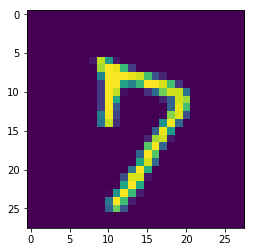

In [103]:
import random as rand
plt.imshow(mnist_data[rand.randrange(len(mnist_data))][0].squeeze())
plt.show()

In [104]:
model = TorchModel()
adam = torch.optim.Adam(model.parameters(), lr=1e-3)
losses = []

In [105]:
def to_one_hot(idx):
    one_hot = torch.zeros(idx.size(0), 10)
    for i in range(idx.size(0)):
        one_hot[i][idx[i].item()] = 1.
    return one_hot

In [106]:
model.train()
for epoch in range(2):
    for i, (x, y) in enumerate(mnist):
        adam.zero_grad()
        l = (to_one_hot(y) - model(x.view(-1, 28**2)))**2 / 2
        l.sum().backward()
        adam.step()
        losses.append(l.sum() / l.size(0))
        print("Batch {} finished".format(i))

Batch 0 finished
Batch 1 finished
Batch 2 finished
Batch 3 finished
Batch 4 finished
Batch 5 finished
Batch 6 finished
Batch 7 finished
Batch 8 finished
Batch 9 finished
Batch 10 finished
Batch 11 finished
Batch 12 finished
Batch 13 finished
Batch 14 finished
Batch 15 finished
Batch 16 finished
Batch 17 finished
Batch 18 finished
Batch 19 finished
Batch 20 finished
Batch 21 finished
Batch 22 finished
Batch 23 finished
Batch 24 finished
Batch 25 finished
Batch 26 finished
Batch 27 finished
Batch 28 finished
Batch 29 finished
Batch 30 finished
Batch 31 finished
Batch 32 finished
Batch 33 finished
Batch 34 finished
Batch 35 finished
Batch 36 finished
Batch 37 finished
Batch 38 finished
Batch 39 finished
Batch 40 finished
Batch 41 finished
Batch 42 finished
Batch 43 finished
Batch 44 finished
Batch 45 finished
Batch 46 finished
Batch 47 finished
Batch 48 finished
Batch 49 finished
Batch 50 finished
Batch 51 finished
Batch 52 finished
Batch 53 finished
Batch 54 finished
Batch 55 finished
Ba

Batch 446 finished
Batch 447 finished
Batch 448 finished
Batch 449 finished
Batch 450 finished
Batch 451 finished
Batch 452 finished
Batch 453 finished
Batch 454 finished
Batch 455 finished
Batch 456 finished
Batch 457 finished
Batch 458 finished
Batch 459 finished
Batch 460 finished
Batch 461 finished
Batch 462 finished
Batch 463 finished
Batch 464 finished
Batch 465 finished
Batch 466 finished
Batch 467 finished
Batch 468 finished
Batch 469 finished
Batch 470 finished
Batch 471 finished
Batch 472 finished
Batch 473 finished
Batch 474 finished
Batch 475 finished
Batch 476 finished
Batch 477 finished
Batch 478 finished
Batch 479 finished
Batch 480 finished
Batch 481 finished
Batch 482 finished
Batch 483 finished
Batch 484 finished
Batch 485 finished
Batch 486 finished
Batch 487 finished
Batch 488 finished
Batch 489 finished
Batch 490 finished
Batch 491 finished
Batch 492 finished
Batch 493 finished
Batch 494 finished
Batch 495 finished
Batch 496 finished
Batch 497 finished
Batch 498 fi

Batch 887 finished
Batch 888 finished
Batch 889 finished
Batch 890 finished
Batch 891 finished
Batch 892 finished
Batch 893 finished
Batch 894 finished
Batch 895 finished
Batch 896 finished
Batch 897 finished
Batch 898 finished
Batch 899 finished
Batch 900 finished
Batch 901 finished
Batch 902 finished
Batch 903 finished
Batch 904 finished
Batch 905 finished
Batch 906 finished
Batch 907 finished
Batch 908 finished
Batch 909 finished
Batch 910 finished
Batch 911 finished
Batch 912 finished
Batch 913 finished
Batch 914 finished
Batch 915 finished
Batch 916 finished
Batch 917 finished
Batch 918 finished
Batch 919 finished
Batch 920 finished
Batch 921 finished
Batch 922 finished
Batch 923 finished
Batch 924 finished
Batch 925 finished
Batch 926 finished
Batch 927 finished
Batch 928 finished
Batch 929 finished
Batch 930 finished
Batch 931 finished
Batch 932 finished
Batch 933 finished
Batch 934 finished
Batch 935 finished
Batch 936 finished
Batch 937 finished
Batch 0 finished
Batch 1 finish

Batch 393 finished
Batch 394 finished
Batch 395 finished
Batch 396 finished
Batch 397 finished
Batch 398 finished
Batch 399 finished
Batch 400 finished
Batch 401 finished
Batch 402 finished
Batch 403 finished
Batch 404 finished
Batch 405 finished
Batch 406 finished
Batch 407 finished
Batch 408 finished
Batch 409 finished
Batch 410 finished
Batch 411 finished
Batch 412 finished
Batch 413 finished
Batch 414 finished
Batch 415 finished
Batch 416 finished
Batch 417 finished
Batch 418 finished
Batch 419 finished
Batch 420 finished
Batch 421 finished
Batch 422 finished
Batch 423 finished
Batch 424 finished
Batch 425 finished
Batch 426 finished
Batch 427 finished
Batch 428 finished
Batch 429 finished
Batch 430 finished
Batch 431 finished
Batch 432 finished
Batch 433 finished
Batch 434 finished
Batch 435 finished
Batch 436 finished
Batch 437 finished
Batch 438 finished
Batch 439 finished
Batch 440 finished
Batch 441 finished
Batch 442 finished
Batch 443 finished
Batch 444 finished
Batch 445 fi

Batch 831 finished
Batch 832 finished
Batch 833 finished
Batch 834 finished
Batch 835 finished
Batch 836 finished
Batch 837 finished
Batch 838 finished
Batch 839 finished
Batch 840 finished
Batch 841 finished
Batch 842 finished
Batch 843 finished
Batch 844 finished
Batch 845 finished
Batch 846 finished
Batch 847 finished
Batch 848 finished
Batch 849 finished
Batch 850 finished
Batch 851 finished
Batch 852 finished
Batch 853 finished
Batch 854 finished
Batch 855 finished
Batch 856 finished
Batch 857 finished
Batch 858 finished
Batch 859 finished
Batch 860 finished
Batch 861 finished
Batch 862 finished
Batch 863 finished
Batch 864 finished
Batch 865 finished
Batch 866 finished
Batch 867 finished
Batch 868 finished
Batch 869 finished
Batch 870 finished
Batch 871 finished
Batch 872 finished
Batch 873 finished
Batch 874 finished
Batch 875 finished
Batch 876 finished
Batch 877 finished
Batch 878 finished
Batch 879 finished
Batch 880 finished
Batch 881 finished
Batch 882 finished
Batch 883 fi

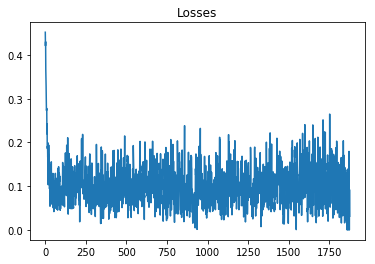

In [111]:
plt.plot(range(len(losses)), losses)
plt.title("Losses")
plt.show()

In [112]:
mnist_data_test = torchvision.datasets.MNIST(root="data/MNIST", train=False, download=True, transform=torchvision.transforms.ToTensor())

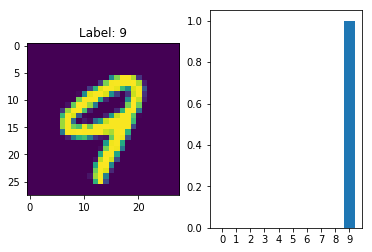

In [113]:
# Test predictions
i = rand.randrange(len(mnist_data_test))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(mnist_data_test[i][0].squeeze())
ax[0].set_title("Label: {}".format(mnist_data_test[i][1]))

model.eval()
pred = model(mnist_data_test[i][0].view(1, 28**2)).detach().view(10)

ax[1].bar(range(10), pred)
ax[1].set_xticks(range(10))

plt.show()

In [114]:
# Test overall performance on test-data
test_data_loader = torch.utils.data.DataLoader(mnist_data_test, batch_size=1)
success = 0
fail = 0

with torch.no_grad():
    model.eval()
    for _, (x, y) in enumerate(test_data_loader):
        if y == torch.argmax(model(x.view(-1, 28**2)).squeeze()):
            success += 1
        else:
            fail += 1
print("Success rate: {}%".format(success * 100. / (success + fail)))

Success rate: 87.32%
